In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import collections

In [13]:
#N = number of nodes 
#c = average degree of nodes
N = 10000
c = 5.76

#generate random network 
G = nx.fast_gnp_random_graph(N,c/N)
#G = nx.barabasi_albert_graph(N,2)

In [17]:
powerGrid = nx.Graph()
with open("inf-power.txt") as f:
    for line in f:
        strippedline = line.strip()
        two_nodes = strippedline.split(" ")
        powerGrid.add_edge(int(two_nodes[0]),int(two_nodes[1]))

In [18]:
def updateGraph(G, threshold):
    changeNodes = []
    for node in G.nodes:
        failureNeighbours = 0
        neighbours = 0
        for neighbour in G.neighbors(node):
            if G.nodes[neighbour]["failure"] == 1:
                failureNeighbours += 1
            neighbours += 1
        if neighbours > 0 and G.nodes[node]["failure"] != 1:
            if failureNeighbours/neighbours >= threshold:
                changeNodes.append(node)
    for node in changeNodes:
        G.nodes[node]["failure"] = 1
    return changeNodes

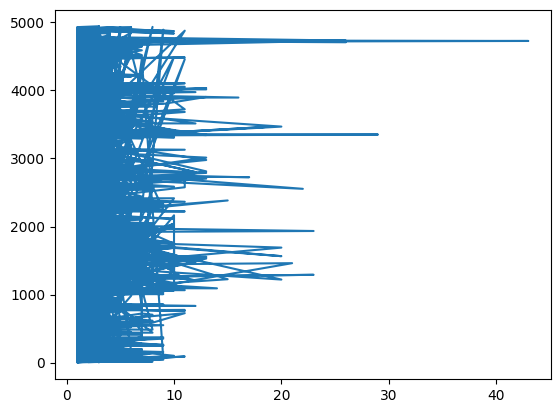

In [27]:
listNodes = powerGrid.nodes
listFail = []
threshold = 0.4

for node in powerGrid.nodes:
    nx.set_node_attributes(powerGrid,{n: {"failure": 0} for n in powerGrid.nodes})
    powerGrid.nodes[node]["failure"] = 1
    newFail = 1
    totalFail = 0
    while newFail != 0:
        totalFail += newFail
        newFail = len(updateGraph(powerGrid,threshold))
    listFail.append(totalFail)
plt.plot(listFail,listNodes)

    

    

(array([4.556e+03, 2.920e+02, 7.400e+01, 5.000e+00, 6.000e+00, 6.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1. ,  5.2,  9.4, 13.6, 17.8, 22. , 26.2, 30.4, 34.6, 38.8, 43. ]),
 <BarContainer object of 10 artists>)

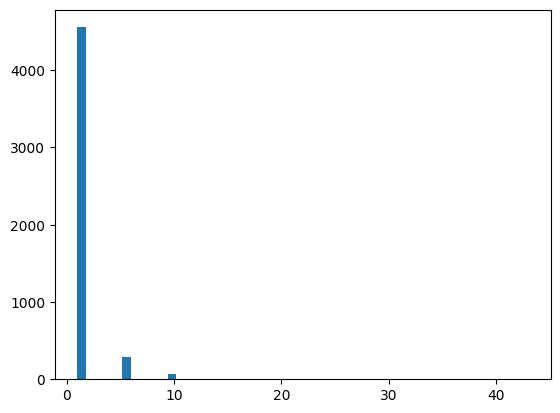

In [28]:
plt.hist(listFail,width=0.8)

-2.909934689567079 0.8128295634118253


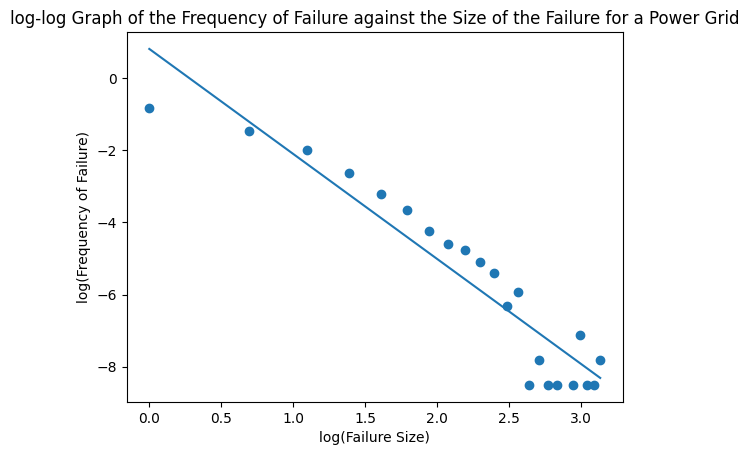

In [29]:
degree_sequence = sorted(listFail, reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
N = len(listNodes)
cnt = [item/N for item in cnt ]

x = np.log(deg[3:])
y = np.log(cnt[3:])

a, b = np.polyfit(x, y, 1)
plt.scatter(x, y)
plt.plot(x,a*x+b)
plt.xlabel("log(Failure Size)")
plt.ylabel("log(Frequency of Failure)")
plt.title("log-log Graph of the Frequency of Failure against the Size of the Failure for a Power Grid")

print(a,b)